In [146]:
import pandas as pd
from ast import literal_eval

import numpy as np
import matplotlib.pyplot as plt
import matplotlib as mpl
import matplotlib.patches as mpatches

tech_goodOrder = [
    "General Literature on CDR/NET",
    "CCS",
    "BECCS",
    "DAC(CS)",
    "CCUS",
    "Soil Carbon Sequestration",
    "AR",
    "restoration of landscapes/peats",
    "Agroforestry",
    "Forest Management",
    "Enhanced Weathering (land based)",
    "Ocean alkalinity enhancement",
    "Blue Carbon",
    "Algae farming",
    "Ocean fertilization & Artificial upwelling",
    
    "Biochar",
    
]

exclude_technologies = ["CCS", "CCUS", "Algae farming","Other technologies",]

tech_goodOrder = [t for t in tech_goodOrder if t not in exclude_technologies]

col_ccs = [
'#e6550d',
'#fdae6b'
] # '#fc8d59','#d7301f']# oranges
col_ccs.reverse() 
col_biochar =  ['#f768a1'] # violet
col_landbased = ['#edf8e9','#bae4b3','#74c476','#31a354','#006d2c'] # greens
col_landbased.reverse() 
col_ew_landbased =  ['#c994c7'] # bright violet
col_ocean = ['#f1eef6','#bdc9e1','#74a9cf'] #,'#0570b0'] # blues
col_gen_other = ['#636363'] #, '#bdbdbd'] # greys

color_tech = (
             col_gen_other +
             col_ccs + 
             col_landbased +
             col_ew_landbased + 
             col_ocean +  
             col_biochar    
             
)
with open("data/15.color.blindness.palette.txt",'r') as f:
    lines = f.readlines()
    lines = lines[10:]
    cb_cols = [i.replace('   ',' ').replace('  ',' ').split(' ')[2].strip() for i in lines]
    cb_cols = ["#"+i for i in cb_cols]
    cb_cols = cb_cols[::2]

    tc = {}
for i, tech in enumerate(tech_goodOrder):
    tc[tech]=color_tech[i]

tc_cb = {}
for i, tech in enumerate(tech_goodOrder):
    tc_cb[tech]=cb_cols[i]    
    

### Load data

In [149]:
df_ex = pd.read_csv("data/allIds__allTech_in_pub_from_run_2023-06-18.csv")
all_info = pd.read_csv("/home/sarah/projects/nets/data/wos_scopus_all.csv")

df_ex = df_ex.merge(all_info[["id","year"]], how="left", on="id")
df = df_ex.groupby(["id","year","first_pred_tech"], as_index=False).agg({'all_pred_tech': lambda x: list(x)})

cc = pd.read_csv("data/docs_on_cc_per_year.csv")
cc = cc.loc[(cc.PY>=1990) &(cc.PY<2022)].rename(columns={"0":"size"})

### Development over time

In [150]:
paper_per_year = df.groupby("year").size().tolist()

all_tech_per_year = df_ex.groupby("year",as_index=False).size().rename(columns={"size":"all_tech_per_year"})
tech_per_year = df_ex.groupby(["year","all_pred_tech"], as_index=False).size()

for year in range(1990,2022):
    for tech in tech_goodOrder:
        if tech_per_year.loc[(tech_per_year.year==year)&(tech_per_year.all_pred_tech==tech)].shape[0]==0:
            one_row = pd.DataFrame({'year': [year], "all_pred_tech": [tech], 'size': [0]})
            tech_per_year = pd.concat([tech_per_year, one_row])
tech_per_year = tech_per_year.sort_values("year")
tech_per_year = tech_per_year.merge(all_tech_per_year, on="year", how="left")
tech_per_year["rel_count"] = tech_per_year["size"]/tech_per_year.all_tech_per_year

def getAR(year):
    if year<=1990:
        return 'AR1'
    if year<=1994:
        return 'AR2'
    if year<=2000:
        return 'AR3'
    if year<=2007:
        return 'AR4'
    if year<=2012:
        return 'AR5'
    if year<=2022:
        return 'AR6'
    
df["AR"] = df["year"].apply(getAR)

AR_grouped_pap = df.groupby(["AR"]).size().reset_index().rename(columns={0:"paper_AR"})

Biochar
Ocean fertilization & Artificial upwelling
Blue Carbon
Ocean alkalinity enhancement
Enhanced Weathering (land based)
Forest Management
Agroforestry
restoration of landscapes/peats
AR
Soil Carbon Sequestration
DAC(CS)
BECCS
General Literature on CDR/NET


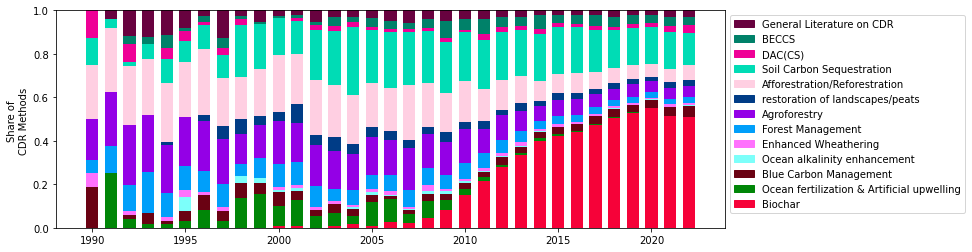

In [148]:
fig, ax = plt.subplots(figsize=(12,4))

tech_goodOrder_reversed = list(reversed(tech_goodOrder))

prev_values = np.zeros(len(tech_per_year.loc[tech_per_year.all_pred_tech==tech_goodOrder[0]]))
for i, tech in enumerate(tech_goodOrder_reversed):
    print(tech)
    ax.bar(years, tech_per_year.loc[tech_per_year.all_pred_tech==tech,"rel_count"], 
              width, bottom=prev_values, 
              label=tech,
              color=tc_cb[tech])
    prev_values += np.array(tech_per_year.loc[tech_per_year.all_pred_tech==tech,"rel_count"])
ax.set_ylabel('Share of \nCDR Methods ')

# legend
legend_labels = []
for tech in tech_goodOrder:
    if tech=="AR":
        lab="Afforestration/Reforestration"
    elif tech=="Blue Carbon":
        lab="Blue Carbon Management"
    elif tech=="General Literature on CDR/NET":
        lab="General Literature on CDR"
    elif "Enhanced " in tech:
        lab="Enhanced Wheathering"
    else:
        lab=tech
    legend_labels.append(mpatches.Patch(color=tc_cb[tech], label=lab))


ax.legend(handles=legend_labels, bbox_to_anchor=(1.0, 1))
fig.savefig('figures/techTime_cbVersion.png', bbox_inches="tight", facecolor='white', edgecolor='none')

Biochar
Ocean fertilization & Artificial upwelling
Blue Carbon
Ocean alkalinity enhancement
Enhanced Weathering (land based)
Forest Management
Agroforestry
restoration of landscapes/peats
AR
Soil Carbon Sequestration
DAC(CS)
BECCS
General Literature on CDR/NET


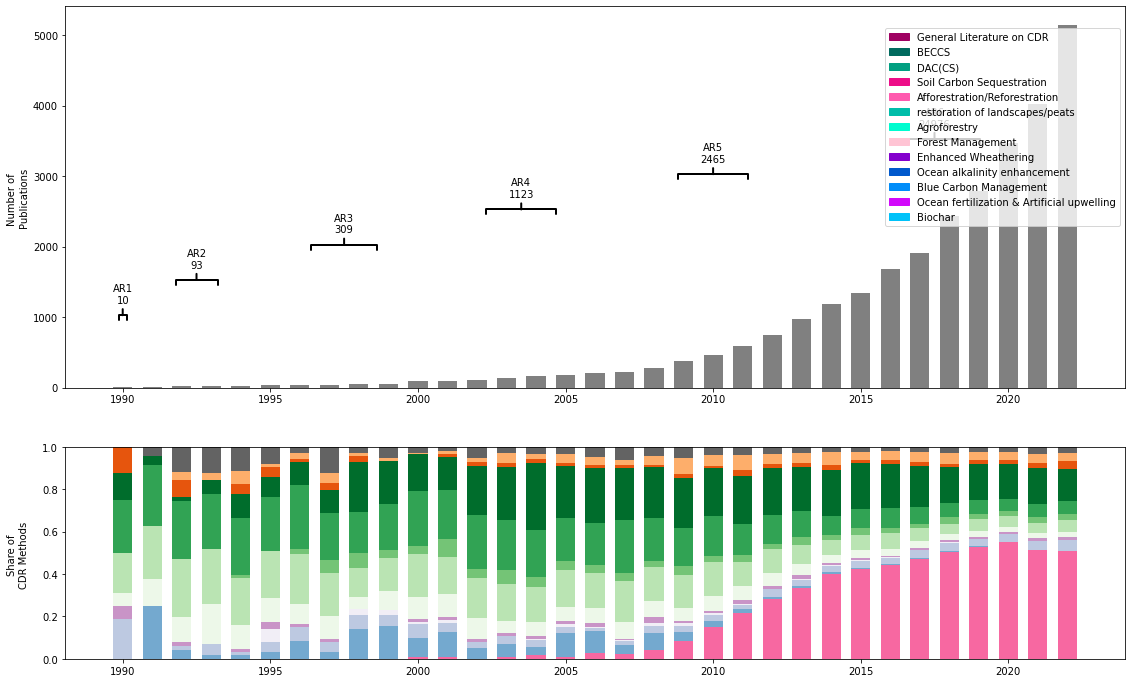

In [105]:
years = [i for i in range(1990,2023)]
ars = [f'AR{i}' for i in range(1,7)]

plot_tech = {}
for tech in tech_goodOrder:
    plot_tech[tech] = tech_per_year.loc[tech_per_year["all_pred_tech"]==tech].sort_values('year')["rel_count"].tolist()
    
#mpl.rcParams.update({'font.size': 27,
#                     'svg.fonttype': 'path'})
width = 0.65       # the width of the bars

fig, ax = plt.subplots(2, figsize=(19,12), gridspec_kw={'height_ratios':[1.8,1]})

fig.add_gridspec(ncols=1, nrows=2,
                          )
### first plot
ax[0].bar(years, paper_per_year, width, color="grey")
ax[0].set_ylabel('Number of \nPublications')

# 
AR_mids = [1990, 1992.5, 1997.5, 2003.5, 2010, 2017.5]
AR_width = [0.4,    2.1,    3.3,  3.5,  3.5,  4.5]
AR_height = []
for i, ar_mid in enumerate(AR_mids):
    count = AR_grouped_pap.loc[AR_grouped_pap.AR==f"AR{i+1}","paper_AR"].values[0]
    ax[0].annotate(
        f"AR{i+1}\n{count}",
        xy=(ar_mid,1000+i*500),
        xytext=(ar_mid,1000+i*500+200),
        ha="center",
        arrowprops=dict(arrowstyle='-[, widthB={}, lengthB=0.5'.format(AR_width[i]), lw=2.0)
    )
ax[0].grid=True

tech_goodOrder_reversed = list(reversed(tech_goodOrder))

prev_values = np.zeros(len(tech_per_year.loc[tech_per_year.all_pred_tech==tech_goodOrder[0]]))
for i, tech in enumerate(tech_goodOrder_reversed):
    print(tech)
    ax[1].bar(years, tech_per_year.loc[tech_per_year.all_pred_tech==tech,"rel_count"], 
              width, bottom=prev_values, 
              label=tech,
              color=tc[tech])
    prev_values += np.array(tech_per_year.loc[tech_per_year.all_pred_tech==tech,"rel_count"])
ax[1].set_ylabel('Share of \nCDR Methods ')


# legend
legend_labels = []
for tech in tech_goodOrder:
    if tech=="AR":
        lab="Afforestration/Reforestration"
    elif tech=="Blue Carbon":
        lab="Blue Carbon Management"
    elif tech=="General Literature on CDR/NET":
        lab="General Literature on CDR"
    elif "Enhanced " in tech:
        lab="Enhanced Wheathering"
    else:
        lab=tech
    legend_labels.append(mpatches.Patch(color=tc_cb[tech], label=lab))


ax[1].legend(handles=legend_labels, bbox_to_anchor=(1.0, 3))

fig.align_ylabels(ax)

### growth rates

In [151]:
# growth rates per technology
tech_per_year["diff_to_prev_year"] = np.nan
for year in range(1990,2022):
    for t in tech_goodOrder:
        diff = tech_per_year.loc[(tech_per_year["year"]==year+1)&(tech_per_year.all_pred_tech==t),"size"].values[0] \
        - tech_per_year.loc[(tech_per_year["year"]==year)&(tech_per_year.all_pred_tech==t),"size"].values[0]
        tech_per_year.loc[(tech_per_year["year"]==year+1)&(tech_per_year.all_pred_tech==t),"diff_to_prev_year"] = diff
tech_per_year["growth_rate"] = tech_per_year["diff_to_prev_year"]/tech_per_year["size"]

cut_off_growth_rate = 50
tech_per_year.loc[tech_per_year["size"]<=cut_off_growth_rate, "growth_rate"] = np.nan

# growth rates for all cdr lit
all_tech_per_year["diff_to_prev_year"] = np.nan
for year in range(1990,2022):
    diff = all_tech_per_year.loc[(all_tech_per_year["year"]==year+1),"all_tech_per_year"].values[0] \
           - all_tech_per_year.loc[(all_tech_per_year["year"]==year),"all_tech_per_year"].values[0]
    all_tech_per_year.loc[all_tech_per_year["year"]==year+1,"diff_to_prev_year"] = diff
all_tech_per_year["growth_rate"] = all_tech_per_year["diff_to_prev_year"]/all_tech_per_year["all_tech_per_year"]
all_tech_per_year.loc[all_tech_per_year["all_tech_per_year"]<=cut_off_growth_rate, "growth_rate"] = np.nan

# growth rates for cc lit
cc["diff_to_prev_year"] = np.nan
for year in range(1990,2021):
    diff = cc.loc[(cc["PY"]==year+1),"size"].values[0] \
           - cc.loc[(cc["PY"]==year),"size"].values[0]
    cc.loc[cc["PY"]==year+1,"diff_to_prev_year"] = diff
cc["growth_rate"] = cc["diff_to_prev_year"]/cc["size"]
cc.loc[cc["size"]<=cut_off_growth_rate, "growth_rate"] = np.nan


In [8]:
tech_per_year[(tech_per_year.all_pred_tech=='Biochar')&(tech_per_year.year>=2014)].growth_rate.mean()

0.19406230293914625

In [158]:
tech_per_year[(tech_per_year.all_pred_tech=='Biochar')&(tech_per_year.year>=2014)]["growth_rate"].std()

0.0586322835175127

In [29]:
tech_per_year.loc[(tech_per_year.all_pred_tech=="DAC(CS)")&(tech_per_year.year>=2014),"growth_rate"].mean()

0.19244727264678785

In [9]:
roll = all_tech_per_year.rolling(3,min_periods=1).mean()

In [30]:
roll.loc[roll.year>=2014].growth_rate.mean()

0.15682991128754542

In [11]:
all_tech_per_year.to_excel("data/techs_per_year.xlsx")
all_tech_per_year.rolling(3,min_periods=1).mean().to_excel("data/techs_per_year_rolling_avg_3years.xlsx")

cc.to_excel("data/cc_per_year.xlsx")

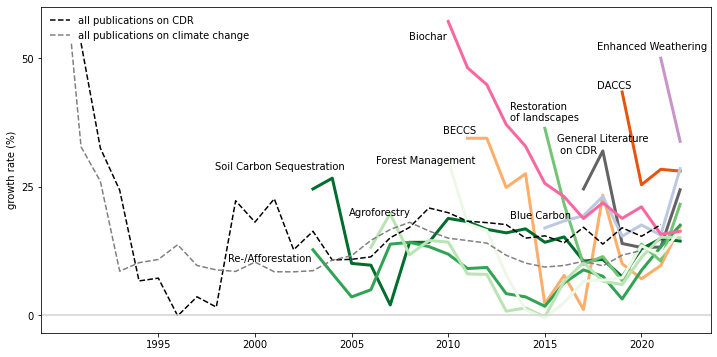

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
for i, t in enumerate(tech_goodOrder):
    part = tech_per_year.loc[tech_per_year.all_pred_tech==t].copy()
    part["r_growth_rate"] = part["growth_rate"].rolling(3,min_periods=1).mean()
    
    ax.plot(np.array(part["year"]),np.array(part["r_growth_rate"]), c=tc[t], lw=3)

roll = all_tech_per_year.rolling(3,min_periods=1).mean()
ax.plot(np.array(roll["year"]),np.array(roll["growth_rate"]), c='black', ls='--', label="all publications on CDR")
roll = cc.rolling(3,min_periods=1).mean()
ax.plot(np.array(roll["PY"]),np.array(roll["growth_rate"]), c='grey', ls='--', label="all publications on climate change")
ax.axhline(y=0, color='lightgrey', linestyle='-')
ax.legend(frameon=False, loc="upper left")
ax.set_xticks([1995,2000,2005,2010,2015,2020])
ax.set_yticks([0,0.25,0.5],[0,25,50])
ax.set_ylabel("growth rate (%)")

plt.text(0.28,0.22, "Re-/Afforestation", transform=ax.transAxes)    
plt.text(0.26,0.5, "Soil Carbon Sequestration", transform=ax.transAxes)    
plt.text(0.46,0.36, "Agroforestry", transform=ax.transAxes)    
plt.text(0.5,0.52, "Forest Management", transform=ax.transAxes)    
plt.text(0.6,0.61, "BECCS", transform=ax.transAxes)    
plt.text(0.55,0.9, "Biochar", transform=ax.transAxes)    
plt.text(0.7,0.65, "Restoration\nof landscapes", transform=ax.transAxes)   
plt.text(0.77,0.55, "General Literature\n on CDR", transform=ax.transAxes)
plt.text(0.83,0.75, "DACCS", transform=ax.transAxes)
plt.text(0.83,0.87, "Enhanced Weathering", transform=ax.transAxes)
plt.text(0.7,0.35, "Blue Carbon", transform=ax.transAxes)

fig.savefig('figures/growth_rates_cbVersion.png', bbox_inches="tight", facecolor='white', edgecolor='none')

In [7]:
print(cc.loc[cc.PY>2010, "growth_rate"].mean())
print(all_tech_per_year.loc[all_tech_per_year.year>2011, "growth_rate"].mean())

0.11612307997958649
0.16527390637666747


In [37]:
all_tech_per_year.loc[all_tech_per_year.year>2011, "growth_rate"].mean()

0.16527390637666747

In [23]:
tech_per_year[]

,year,all_pred_tech,size,all_tech_per_year,rel_count,diff_to_prev_year,growth_rate
0,1990.0,AR,4,16,0.250000,NaN,NaN
1,1990.0,Ocean alkalinity enhancement,0,16,0.000000,NaN,NaN
2,1990.0,Ocean fertilization & Artificial upwelling,0,16,0.000000,NaN,NaN
3,1990.0,General Literature on CDR/NET,0,16,0.000000,NaN,NaN
4,1990.0,BECCS,0,16,0.000000,NaN,NaN
...,...,...,...,...,...,...,...
424,2022.0,Ocean alkalinity enhancement,24,6328,0.003793,9.0,NaN
425,2022.0,Ocean fertilization & Artificial upwelling,16,6328,0.002528,7.0,NaN
426,2022.0,Soil Carbon Sequestration,957,6328,0.151233,87.0,0.090909
427,2022.0,Agroforestry,340,6328,0.053729,77.0,0.226471


### Altogether

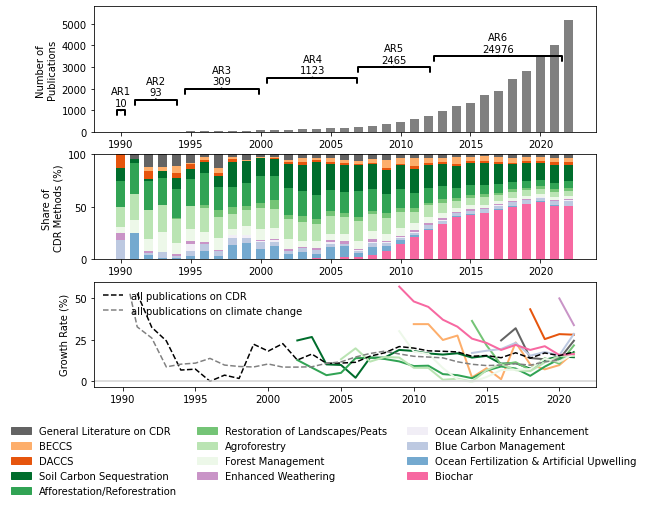

In [9]:
years = [i for i in range(1990,2023)]
ars = [f'AR{i}' for i in range(1,7)]

plot_tech = {}
for tech in tech_goodOrder:
    plot_tech[tech] = tech_per_year.loc[tech_per_year["all_pred_tech"]==tech].sort_values('year')["rel_count"].tolist()
    
#mpl.rcParams.update({'font.size': 10,
#                     'svg.fonttype': 'path'})
width = 0.65       # the width of the bars

fig, ax = plt.subplots(3, figsize=(9,7), gridspec_kw={'height_ratios':[1.2,1,1]})

fig.add_gridspec(ncols=1, nrows=3,
                          )
### ABSOLUTE NUMBERS ##########################################################################
ax[0].bar(years, paper_per_year, width, color="grey")
ax[0].set_ylabel('Number of \nPublications')
ax[0].set_ylim(0,5800)

# 
AR_mids = [1990, 1992.5, 1997.2, 2003.7, 2009.5, 2017]
AR_width = [0.4,    2.1,    3.7,  4.5,  3.6,  6.4]
AR_height = []
for i, ar_mid in enumerate(AR_mids):
    count = AR_grouped_pap.loc[AR_grouped_pap.AR==f"AR{i+1}","paper_AR"].values[0]
    ax[0].annotate(
        f"AR{i+1}\n{count}",
        xy=(ar_mid,1000+i*500),
        xytext=(ar_mid,1000+i*500+200),
        ha="center",
        arrowprops=dict(arrowstyle='-[, widthB={}, lengthB=0.5'.format(AR_width[i]), lw=2.0)
    )
ax[0].grid=True

def getAR(year):
    if year<=1990:
        return 'AR1'
    if year<=1994:
        return 'AR2'
    if year<=2000:
        return 'AR3'
    if year<=2007:
        return 'AR4'
    if year<=2012:
        return 'AR5'
    if year<=2022:
        return 'AR6'

### RELATIVE NUMBERS ##########################################################################
tech_goodOrder_reversed = list(reversed(tech_goodOrder))

prev_values = np.zeros(len(tech_per_year.loc[tech_per_year.all_pred_tech==tech_goodOrder[0]]))
for i, tech in enumerate(tech_goodOrder_reversed):
    ax[1].bar(years, tech_per_year.loc[tech_per_year.all_pred_tech==tech,"rel_count"], 
              width, bottom=prev_values, 
              label=tech,
              color=tc[tech])
    prev_values += np.array(tech_per_year.loc[tech_per_year.all_pred_tech==tech,"rel_count"])
ax[1].set_ylabel('Share of \nCDR Methods (%)')
ax[1].set_yticks([0,0.5,1],[0,50,100])



# legend
legend_labels = []
for tech in tech_goodOrder:
    if tech=="AR":
        lab="Afforestation/Reforestration"
    elif "restoration" in tech:
        lab="Restoration of Landscapes/Peats"
    elif tech=="Blue Carbon":
        lab="Blue Carbon Management"
    elif tech=="General Literature on CDR/NET":
        lab="General Literature on CDR"
    elif "Enhanced " in tech:
        lab="Enhanced Weathering"
    elif "welling" in tech:
        lab="Ocean Fertilization & Artificial Upwelling"
    elif 'alkalinity' in tech:
        lab="Ocean Alkalinity Enhancement"
    elif 'DAC(CS)' in tech:
        lab="DACCS"
    else:
        lab=tech
    legend_labels.append(mpatches.Patch(color=tc[tech], label=lab))


ax[1].legend(handles=legend_labels, bbox_to_anchor=(1.1, -1.5), ncol=3, frameon=False)

### GROWTH RATES ##########################################################################Ich komme auf jeden fall Donnerstag.

for t in tech_goodOrder:
    part = tech_per_year.loc[tech_per_year.all_pred_tech==t]
    part = part.rolling(3,min_periods=1).mean()
    ax[2].plot(part["year"],part["growth_rate"], c=tc[t], lw=2)
roll = all_tech_per_year.rolling(3,min_periods=1).mean()
ax[2].plot(roll["year"],roll["growth_rate"], c='black', ls='--', label="all publications on CDR")
roll = cc.rolling(3,min_periods=1).mean()
ax[2].plot(roll["PY"],roll["growth_rate"], c='grey', ls='--', label="all publications on climate change")
ax[2].axhline(y=0, color='lightgrey', linestyle='-')
ax[2].legend(frameon=False)
ax[2].set_xticks([1990,1995,2000,2005,2010,2015,2020])
ax[2].set_yticks([0,0.25,0.5],[0,25,50])
ax[2].set_ylabel("Growth Rate (%)")
ax[2].set_xlim(1988,2022.5)

fig.align_xlabels(ax)
fig.savefig('figures/time.png', bbox_inches="tight", facecolor='white', edgecolor='none')

### Save data as Excel

In [31]:
tech_per_year.to_excel('figures/fig_data/fig_time__all_data.xlsx', index=False)

### Some analysis for paper

In [125]:
tech_per_year.loc[tech_per_year.year==2022]

,year,all_pred_tech,size,all_tech_per_year,rel_count,diff_to_prev_year,growth_rate
416,2022.0,restoration of landscapes/peats,174,6328,0.027497,45.0,0.258621
417,2022.0,BECCS,244,6328,0.038559,36.0,0.147541
418,2022.0,Biochar,3211,6328,0.507427,603.0,0.187792
419,2022.0,Blue Carbon,312,6328,0.049305,110.0,0.352564
420,2022.0,DAC(CS),217,6328,0.034292,92.0,0.423963
421,2022.0,Enhanced Weathering (land based),68,6328,0.010746,12.0,0.176471
422,2022.0,Forest Management,167,6328,0.026391,49.0,0.293413
423,2022.0,General Literature on CDR/NET,185,6328,0.029235,21.0,0.113514
424,2022.0,Ocean alkalinity enhancement,24,6328,0.003793,9.0,NaN
425,2022.0,Ocean fertilization & Artificial upwelling,16,6328,0.002528,7.0,NaN


In [70]:
scsBiochar_NumIds = df_ex.loc[(df_ex.all_pred_tech=="Biochar")|(df_ex.all_pred_tech=="Soil Carbon Sequestration"),"id"].nunique()
biochar_numids= df_ex.loc[(df_ex.all_pred_tech=="Biochar"),"id"].nunique()
ar_numids= df_ex.loc[(df_ex.all_pred_tech=="AR"),"id"].nunique()
forest_numids= df_ex.loc[(df_ex.all_pred_tech=='Forest Management'),"id"].nunique()

all_ids = df_ex.id.nunique()
print(scs_NumIds/all_ids)
for t in df_ex.all_pred_tech.unique():
    print(t)
    num_ids = df_ex.loc[df_ex.all_pred_tech==t,"id"].nunique()
    print(num_ids)
    print(num_ids/all_ids)
    print()

0.7166965764770845
Biochar
16232
0.560187741579238

Agroforestry
2817
0.09721838763114302

AR
3468
0.11968525676421866

Soil Carbon Sequestration
6979
0.24085450027609057

Blue Carbon
1378
0.0475565985643291

General Literature on CDR/NET
1092
0.03768636112644948

restoration of landscapes/peats
1037
0.035788238542241856

Forest Management
1366
0.04714246272777471

Ocean alkalinity enhancement
152
0.005245720596355604

Ocean fertilization & Artificial upwelling
410
0.014149641082274986

Enhanced Weathering (land based)
406
0.014011595803423522

DAC(CS)
822
0.028368304803975702

BECCS
1617
0.05580480397570403



In [ ]:
df2022 = df_ex.loc[df_ex.year==2022]
df2022.loc[df2022.all_pred_tech=="Biochar","id"].nunique()/df2022.id.nunique()

#### Table in study

In [47]:
tech_dict = {
 'AR':'Aforestation/Reforestation',
 'restoration of landscapes/peats':'Restoration of Landscapes/Peats',
 'Ocean alkalinity enhancement':'Ocean Alkalinity Enhancement',
 'Ocean fertilization & Artificial upwelling':'Ocean Fertilization & Artificial Upwelling'
}

In [66]:
np.mean(tech_per_year.loc[(tech_per_year.all_pred_tech=="BECCS") & (tech_per_year.year>2021),"growth_rate"])

0.14754098360655737

In [48]:
table_display = df_ex.groupby("all_pred_tech", as_index=False).size()
table_display["percentage of studies"] = table_display["size"]/df_ex.id.nunique()*100
table_display["average growth between 2012 and 2017"] = np.nan
table_display["average growth of the past 5 years"] = np.nan
table_display["average growth of the past 10 years"] = np.nan

for t in df_ex.all_pred_tech.unique():
    print(t)
    
    part = tech_per_year[tech_per_year.all_pred_tech==t]

    year_end = 2018
    year_ranges = [5]    
    for yr in year_ranges:
        year_start = year_end - yr
        years = [i for i in range(year_start, year_end)]
        part_y = part.loc[part["year"].isin(years)]
        shape_before = part_y.shape[0]
        part_y = part_y.dropna(subset=["growth_rate"])
        if part_y.shape[0] == yr:
            #print("True")
            table_display.loc[table_display.all_pred_tech==t,
                              f'average growth between 2012 and 2017'] = part_y.growth_rate.mean()
    
    
    year_end = 2023
    year_ranges = [5, 10]    
    for yr in year_ranges:
        year_start = year_end - yr
        years = [i for i in range(year_start, year_end)]
        part_y = part.loc[part["year"].isin(years)]
        shape_before = part_y.shape[0]
        part_y = part_y.dropna(subset=["growth_rate"])
        if part_y.shape[0] == yr:
            #print("True")
            table_display.loc[table_display.all_pred_tech==t,
                              f'average growth of the past {yr} years'] = part_y.growth_rate.mean()
            
all_lit = ['All Studies', df_ex.id.nunique(), 100]
year_end = 2018
year_ranges = [5]    
for yr in year_ranges:
    year_start = year_end - yr
    years = [i for i in range(year_start, year_end)]
    part_y = all_tech_per_year.loc[all_tech_per_year["year"].isin(years)]
    if part_y.shape[0] == yr:
        all_lit.append(part_y.growth_rate.mean())
    
year_end = 2023
year_ranges = [5, 10]    
for yr in year_ranges:    
    year_start = year_end - yr
    print(year_start, year_end)
    years = [i for i in range(year_start, year_end)]
    print(years)
    part_y = all_tech_per_year.loc[all_tech_per_year["year"].isin(years)]
    part_y = part_y.dropna(subset=["growth_rate"])
    if part_y.shape[0] == yr:
        all_lit.append(part_y.growth_rate.mean())

all_lit_df = pd.DataFrame([all_lit], columns=table_display.columns)

table_display = pd.concat([table_display, all_lit_df])

table_display["all_pred_tech"] = table_display["all_pred_tech"].replace(tech_dict)
            
table_display.rename(columns={"size": "number of studies",
                     "all_pred_tech": "CDR technology"}).to_excel("figures/fig_data/display_table.xlsx", index=False)
table_display

Biochar
Agroforestry
AR
Soil Carbon Sequestration
Blue Carbon
General Literature on CDR/NET
restoration of landscapes/peats
Forest Management
Ocean alkalinity enhancement
Ocean fertilization & Artificial upwelling
Enhanced Weathering (land based)
DAC(CS)
BECCS
2018 2023
[2018, 2019, 2020, 2021, 2022]
2013 2023
[2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020, 2021, 2022]


,all_pred_tech,size,percentage of studies,average growth between 2012 and 2017,average growth of the past 5 years,average growth of the past 10 years
0,Aforestation/Reforestation,3468,11.968526,0.044191,0.138558,0.091375
1,Agroforestry,2817,9.721839,0.027499,0.146320,0.086910
2,BECCS,1617,5.580480,0.116718,0.123937,0.120327
3,Biochar,16232,56.018774,0.233569,0.183592,0.208581
4,Blue Carbon,1378,4.755660,NaN,0.220449,NaN
5,DAC(CS),822,2.836830,NaN,NaN,NaN
6,Enhanced Weathering (land based),406,1.401160,NaN,NaN,NaN
7,Forest Management,1366,4.714246,0.017964,0.148242,0.083103
8,General Literature on CDR/NET,1092,3.768636,NaN,0.180983,NaN
9,Ocean Alkalinity Enhancement,152,0.524572,NaN,NaN,NaN


In [51]:
small_techs = ['Enhanced Weathering (land based)', 'Ocean fertilization & Artificial upwelling', 'Ocean alkalinity enhancement']

In [53]:
tech_per_year.loc[(tech_per_year.all_pred_tech.isin(small_techs))&(tech_per_year.year>2012)]

,year,all_pred_tech,size,all_tech_per_year,rel_count,diff_to_prev_year,growth_rate
303,2013.0,Enhanced Weathering (land based),23,1352,0.017012,9.0,NaN
306,2013.0,Ocean alkalinity enhancement,11,1352,0.008136,9.0,NaN
307,2013.0,Ocean fertilization & Artificial upwelling,11,1352,0.008136,1.0,NaN
312,2014.0,Ocean fertilization & Artificial upwelling,17,1532,0.011097,6.0,NaN
319,2014.0,Enhanced Weathering (land based),16,1532,0.010444,-7.0,NaN
322,2014.0,Ocean alkalinity enhancement,5,1532,0.003264,-6.0,NaN
333,2015.0,Enhanced Weathering (land based),21,1738,0.012083,5.0,NaN
335,2015.0,Ocean alkalinity enhancement,6,1738,0.003452,1.0,NaN
336,2015.0,Ocean fertilization & Artificial upwelling,14,1738,0.008055,-3.0,NaN
339,2016.0,Ocean alkalinity enhancement,6,2249,0.002668,0.0,NaN
